In [1]:
!pip install SQLAlchemy psycopg2-binary


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 14.2 MB/s eta 0:00:00


In [2]:
from sqlalchemy import create_engine

# Replace placeholders with your AWS RDS credentials
DATABASE_TYPE = 'empty'
USER = 'empty'
PASSWORD = 'empty'  # Replace with your actual password
HOST = 'empty'
PORT = 'empty'
DATABASE = 'empty'  # Replace with your actual database name

# Create the engine
DATABASE_URL = f"{DATABASE_TYPE}://{USER}:{PASSWORD}@{HOST}:{PORT}/{DATABASE}"
engine = create_engine(DATABASE_URL)

In [18]:
import pandas as pd

# Write the query
query = "SELECT * FROM stocks_data;"  # Replace with the name of your table

# Load data into Pandas DataFrame
df = pd.read_sql(query, engine)

# Show the first few rows of the dataset
print(df.head())

         Date  Open    High     Low   Close  Volume  OpenInt Identifier
0  2016-03-24  6.57  6.5800  6.3800  6.5600    8145        0       abil
1  2016-03-28  6.43  6.4300  5.7601  6.0700    9900        0       abil
2  2016-03-29  6.25  6.2800  6.0500  6.2500    1960        0       abil
3  2016-03-30  6.25  6.4022  6.1500  6.2000    3970        0       abil
4  2016-04-01  6.24  6.2400  6.0200  6.1885    2998        0       abil


In [19]:
print(df.tail())

                Date  Open  High     Low  Close  Volume  OpenInt Identifier
14887660  2016-03-17  6.37  6.40  6.1900  6.300    8859        0       abil
14887661  2016-03-18  6.39  6.39  6.1500  6.380    6043        0       abil
14887662  2016-03-21  6.35  6.35  5.9001  6.225   11592        0       abil
14887663  2016-03-22  6.22  6.32  5.9600  6.140   27411        0       abil
14887664  2016-03-23  6.25  6.65  6.1300  6.480   15764        0       abil


In [20]:
# Display basic information about the dataset
print(df.info())

# Get statistical summaries of the data
print(df.describe())

# Check for missing values
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14887665 entries, 0 to 14887664
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Date        object 
 1   Open        float64
 2   High        float64
 3   Low         float64
 4   Close       float64
 5   Volume      int64  
 6   OpenInt     int64  
 7   Identifier  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 908.7+ MB
None
               Open          High           Low         Close        Volume  \
count  1.488766e+07  1.488766e+07  1.488766e+07  1.488766e+07  1.488766e+07   
mean   3.038538e+04  3.121247e+04  2.936176e+04  3.024522e+04  1.585730e+06   
std    4.202501e+06  4.323486e+06  4.046981e+06  4.180590e+06  7.635187e+06   
min    0.000000e+00  4.000000e-03 -1.000000e+00  3.700000e-03  0.000000e+00   
25%    7.750000e+00  7.884000e+00  7.610000e+00  7.750000e+00  3.280000e+04   
50%    1.568000e+01  1.591900e+01  1.543100e+01  1.568000e+01  1.922660e+05   
75%    2.89000

In [21]:
unique_identifiers = df['Identifier'].unique()
print(unique_identifiers)

['abil' 'cni' 'rxiiw' ... 'eqm' 'mtsc' 'schw']


In [28]:
import pandas as pd

# Assuming 'unique_identifiers' is your list of identifiers
# Remove None values before sorting
unique_identifiers_cleaned = [identifier for identifier in unique_identifiers if identifier is not None]
unique_identifiers_sorted = sorted(unique_identifiers_cleaned)  # Sort identifiers alphabetically

# Convert the sorted identifiers into a pandas DataFrame for easier display
df_identifiers = pd.DataFrame(unique_identifiers_sorted, columns=['Identifier'])

# Function to filter and display identifiers based on starting letter
def display_identifiers_by_letter(letter):
    # Filter rows where 'Identifier' starts with the specified letter
    filtered_df = df_identifiers[df_identifiers['Identifier'].str.startswith(letter, na=False)]

    if filtered_df.empty:
        print(f"No identifiers found starting with '{letter}'")
    else:
        # Print or display the filtered list
        num_columns = 20
        filtered_list = filtered_df['Identifier'].tolist()

        # Create a DataFrame and reshape it to display in rows and columns
        num_rows = -(-len(filtered_list) // num_columns)  # Calculate ceiling division
        filtered_df_reshaped = pd.DataFrame(filtered_list + [None] * (num_rows * num_columns - len(filtered_list)))
        filtered_df_reshaped = filtered_df_reshaped.values.reshape(num_rows, num_columns)

        # Convert back to DataFrame for better display
        filtered_df_reshaped = pd.DataFrame(filtered_df_reshaped)
        display(filtered_df_reshaped)

# Example usage:
# To display all identifiers starting with the letter 'a'
display_identifiers_by_letter('a')


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,a,aa,aaap,aaba,aac,aal,aamc,aame,aan,aaoi,aaon,aap,aapl,aat,aau,aav,aaww,aaxn,ab,abac
1,abax,abb,abbv,abc,abcb,abcd,abco,abdc,abe,abeo,abeow,abev,abg,abil,abio,ablx,abm,abmd,abr,abr_a
2,abr_b,abr_c,abrn,abt,abtx,abus,abx,aby,ac,acad,acbi,acc,acco,acer,acerw,acet,acfc,acgl,acglo,acglp
3,ach,achc,achn,achv,acia,aciu,aciw,acls,acm,acmr,acn,acnb,acor,acp,acre,acrs,acrx,acsf,acsi,acst
4,acta,actg,acu,acv,acxm,acy,adap,adbe,adc,ades,adhd,adi,adm,adma,admp,adms,adnt,adom,adp,adro
5,ads,adsk,adsw,adtn,adus,advm,adx,adxs,adxsw,ae,aeb,aed,aee,aeg,aegn,aeh,aehr,aeis,aek,ael
6,aem,aemd,aeo,aep,aer,aeri,aes,aet,aeti,aeua,aey,aezs,afam,afb,afc,afg,afge,afgh,afh,afhbl
7,afi,afl,afmd,afsd,afsi,afsi_a,afsi_b,afsi_c,afsi_d,afsi_e,afsi_f,afss,afst,aft,afty,ag,agc,agco,agd,agen
8,agfs,agfsw,agge,aggp,aggy,agi,agii,agiil,agio,agle,agm,agm-a,agm_a,agm_b,agm_c,agn,agn_a,agnc,agncb,agncn
9,ago,ago_b,ago_e,ago_f,agr,agro,agrx,agt,agtc,agu,agx,agys,ahc,ahgp,ahh,ahl,ahl_c,ahl_d,ahp,ahp_b


In [ ]:
import matplotlib.pyplot as plt

# Plot the 'Close' prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='b')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.title('Stock Closing Price Over Time')
plt.legend()
plt.grid(True)
plt.show()

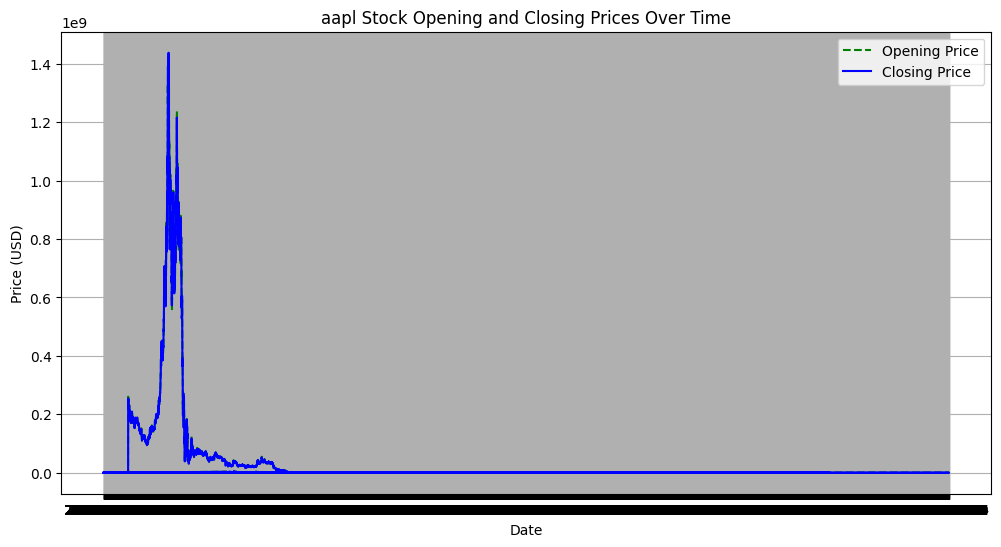

In [29]:
import matplotlib.pyplot as plt

# Assuming 'stock_name' holds the name of the stock you are plotting
stock_name = 'aapl'  # Example stock name

# Plot the 'Open' and 'Close' prices over time for the specified stock
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Open'], label='Opening Price', color='g', linestyle='--')
plt.plot(df['Date'], df['Close'], label='Closing Price', color='b')

# Labels and title with stock name
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title(f'{stock_name} Stock Opening and Closing Prices Over Time')

# Adding legend and grid for better readability
plt.legend()
plt.grid(True)

# Display the plot
plt.show()
